## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
features['price'] = boston.target

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [6]:
features.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
X = features.iloc[:,0:-1]
y = features.iloc[:,-1]

In [8]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle = True, random_state=12) 

In [9]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = regressor.fit(X = train, y = train_y)
    model_pred = model.predict(X = valid)
    errors = abs(model_pred - valid_y)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.38


In [10]:
# Print the first 10 true and predicted responses
model_pred[0:10]

array([ 15.09,  19.82,  23.55,  24.1 ,  23.17,  28.31,  23.99,  19.64,
        19.23,  19.65])

In [11]:
valid_y[0:10].values

array([ 14.8,  19.4,  23.4,  24.1,  24.8,  28.7,  27.5,  20.1,  19.4,  21.7])

In [12]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [13]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
# Print the first 10 true and predicted responses
y_test[0:10].values

array([ 23.6,  32.4,  13.6,  22.8,  16.1,  20. ,  17.8,  14. ,  19.6,  16.8])

In [16]:
y_pred[0:10]

array([ 22.48,  30.14,  18.46,  22.98,  16.28,  21.7 ,  21.13,  16.11,
        20.64,  19.82])

Text(0.5,1,'Actual Prices vs Predicted prices')

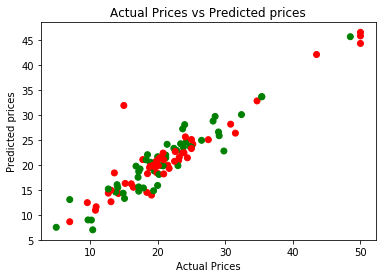

In [18]:
#Plotting the scatter plots
plt.scatter(y_test, y_pred, color = ['red', 'green'])
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted prices")

In [17]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.03


Observation : Applying 10 fold cross validation on datapoints and fitting those in random forest regressor, Mean absolute error value is 2.38 as opposed to Mean absolute error value of 2.03 while applying train test split in random forest regressor.